# Обучение классификаторов отзывов

Импорт необходимых библиотек

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [116]:
# Загрузка данных
data = pd.read_csv('task-3-dataset.csv')
# замена + на 1, - на 0
data['разметка'] = data['разметка'].apply(lambda x: 0 if x == '-' else 1)



In [117]:
# Предобработка текста
def preprocess_text(text):
    # Токенизация
    tokens = word_tokenize(text.lower().translate( str.maketrans('', '', string.punctuation)))

    # Удаление стоп-слов
    stop_words = set(stopwords.words('russian'))
    tokens = [token for token in tokens if token not in stop_words]

    # Лемматизация
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)

data['отзывы'] = data['отзывы'].apply(preprocess_text)

## TF-IDF токенизация

In [118]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(data['отзывы'], data['разметка'], test_size=0.2, random_state=42)

# Преобразование текстовых данных в числовые признаки с помощью TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## RandomForest

In [119]:
from sklearn.ensemble import RandomForestClassifier
# Определение параметров для GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Количество деревьев в лесу
    'max_depth': [5, 10, 15],       # Максимальная глубина каждого дерева
    'min_samples_split': [2, 5, 10] # Минимальное количество образцов для разделения узла
}

# Создание и обучение модели RandomForestClassifier с GridSearchCV
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)

# Предсказание на тестовом наборе с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность модели на тестовом наборе: {accuracy}")


Лучшие параметры: {'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 200}
Лучшая оценка: 0.6843137254901961
Точность модели на тестовом наборе: 0.7380952380952381


## Support Vector Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [120]:
# Обучение классификатора SVM
classifier = SVC()
classifier.fit(X_train_tfidf, y_train)

# Предсказание на тестовом наборе
y_pred = classifier.predict(X_test_tfidf)

# Оценка точности классификатора
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.8809523809523809


## Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [121]:
from sklearn.linear_model import LogisticRegression

# Определение параметров для GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Параметр регуляризации
    'penalty': ['l1', 'l2']  # Тип регуляризации
}

# Создание и обучение модели LogisticRegression с GridSearchCV
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)

# Предсказание на тестовом наборе с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность модели на тестовом наборе: {accuracy}")

Лучшие параметры: {'C': 10.0, 'penalty': 'l2'}
Лучшая оценка: 0.7552584670231728
Точность модели на тестовом наборе: 0.7380952380952381


D:\Soft\miniforge\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Soft\miniforge\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Soft\miniforge\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "D:\Soft\miniforge\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\Soft\miniforge\l

# Нейросетевые подходы

In [122]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from datasets import load_dataset
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import nltk

from collections import Counter
from typing import List
import string

import seaborn
seaborn.set(palette='summer')

In [123]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1317404\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [124]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Подготовка данных

In [125]:
import pandas as pd
dataset = pd.read_csv("task-3-dataset.csv")
dataset['разметка'] = dataset['разметка'].apply(lambda x: 0 if x == '-' else 1)
Train, Test = train_test_split(dataset, test_size =  0.2, random_state=42)

In [126]:
words = Counter()

for example in tqdm(dataset['отзывы']):
    # Приводим к нижнему регистру и убираем пунктуацию
    processed_text = example.lower().translate( str.maketrans('', '', string.punctuation))

    for word in word_tokenize(processed_text):
        words[word] += 1

  0%|          | 0/210 [00:00<?, ?it/s]

In [127]:
vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])

for char, cnt in words.items():
    vocab.add(char)

In [128]:
len(vocab)

1266

In [129]:
word2ind = {char: i for i, char in enumerate(vocab)}
ind2word = {i: char for char, i in word2ind.items()}

In [130]:
class WordDataset:
    def __init__(self, sentences):
        self.data = sentences
        self.unk_id = word2ind['<unk>']
        self.bos_id = word2ind['<bos>']
        self.eos_id = word2ind['<eos>']
        self.pad_id = word2ind['<pad>']

    def __getitem__(self, idx: int) -> List[int]:
        processed_text = self.data['отзывы'].tolist()[idx].lower().translate(str.maketrans('', '', string.punctuation))
        tokenized_sentence = [self.bos_id]
        tokenized_sentence += [
            word2ind.get(word, self.unk_id) for word in word_tokenize(processed_text)
            ]
        tokenized_sentence += [self.eos_id]

        train_sample = {
            "text": tokenized_sentence,
            "label": self.data['разметка'].tolist()[idx]
        }

        return train_sample

    def __len__(self) -> int:
        return len(self.data)

In [131]:
def collate_fn_with_padding(
    input_batch: List[List[int]], pad_id=word2ind['<pad>'], max_len=256) -> torch.Tensor:
    seq_lens = [len(x['text']) for x in input_batch]
    max_seq_len = min(max(seq_lens), max_len)

    new_batch = []
    for sequence in input_batch:
        sequence['text'] = sequence['text'][:max_seq_len]
        for _ in range(max_seq_len - len(sequence['text'])):
            sequence['text'].append(pad_id)

        new_batch.append(sequence['text'])

    sequences = torch.LongTensor(new_batch).to(device)
    labels = torch.LongTensor([x['label'] for x in input_batch]).to(device)

    new_batch = {
        'input_ids': sequences,
        'label': labels
    }

    return new_batch

In [132]:
train_dataset = WordDataset(Train)

np.random.seed(42)
idx = np.random.choice(np.arange(len(Test)), len(Test))
eval_dataset = WordDataset(Test)

batch_size = 8
train_dataloader = DataLoader(
    train_dataset, shuffle=True, collate_fn=collate_fn_with_padding, batch_size=batch_size)

eval_dataloader = DataLoader(
    eval_dataset, shuffle=False, collate_fn=collate_fn_with_padding, batch_size=batch_size)

## Архитектура модели

In [133]:
class CharLM(nn.Module):
    def __init__(
        self, hidden_dim: int, vocab_size: int, num_classes: int = 2,
        aggregation_type: str = 'max'
        ):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.rnn = nn.RNN(hidden_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, hidden_dim)
        self.projection = nn.Linear(hidden_dim, num_classes)

        self.non_lin = nn.Tanh()
        self.dropout = nn.Dropout(p=0.1)

        self.aggregation_type = aggregation_type

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)  # [batch_size, seq_len, hidden_dim]
        output, _ = self.rnn(embeddings)  # [batch_size, seq_len, hidden_dim]

        if self.aggregation_type == 'max':
            output = output.max(dim=1)[0] #[batch_size, hidden_dim]
        elif self.aggregation_type == 'mean':
            output = output.mean(dim=1) #[batch_size, hidden_dim]
        else:
            raise ValueError("Invalid aggregation_type")

        output = self.dropout(self.linear(self.non_lin(output)))  # [batch_size, hidden_dim]
        prediction = self.projection(self.non_lin(output))  # [batch_size, num_classes]

        return prediction

## Train loop

In [134]:
def evaluate(model) -> float:
    """
    Calculate accuracy on validation dataloader.
    """

    predictions = []
    target = []
    with torch.no_grad():
        for batch in eval_dataloader:
            logits = model(batch['input_ids'])
            predictions.append(logits.argmax(dim=1))
            target.append(batch['label'])

    predictions = torch.cat(predictions)
    target = torch.cat(target)
    accuracy = (predictions == target).float().mean().item()

    return accuracy

In [135]:
model = CharLM(hidden_dim=256, vocab_size=len(vocab)).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=word2ind['<pad>'])
optimizer = torch.optim.Adam(model.parameters())

In [136]:
num_epoch = 20
eval_steps = len(train_dataloader) // 2


losses_type = {}
acc_type = {}

for aggregation_type in ['max']:
    print(f"Starting training for {aggregation_type}")
    losses = []
    acc = []

    model = CharLM(
        hidden_dim=256, vocab_size=len(vocab), aggregation_type=aggregation_type).to(device)
    criterion = nn.CrossEntropyLoss(ignore_index=word2ind['<pad>'])
    optimizer = torch.optim.Adam(model.parameters())

    for epoch in range(num_epoch):
        epoch_losses = []
        model.train()
        for i, batch in enumerate(tqdm(train_dataloader, desc=f'Training epoch {epoch}:')):
            optimizer.zero_grad()
            logits = model(batch['input_ids'])
            loss = criterion(logits, batch['label'])
            loss.backward()
            optimizer.step()

            epoch_losses.append(loss.item())
            if i % eval_steps == 0:
                model.eval()
                acc.append(evaluate(model))
                model.train()

        losses.append(sum(epoch_losses) / len(epoch_losses))

    losses_type[aggregation_type] = losses
    acc_type[aggregation_type] = acc

Starting training for max


Training epoch 0::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 1::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 2::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 3::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 4::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 5::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 6::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 7::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 8::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 9::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 10::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 11::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 12::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 13::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 14::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 15::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 16::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 17::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 18::   0%|          | 0/21 [00:00<?, ?it/s]

Training epoch 19::   0%|          | 0/21 [00:00<?, ?it/s]

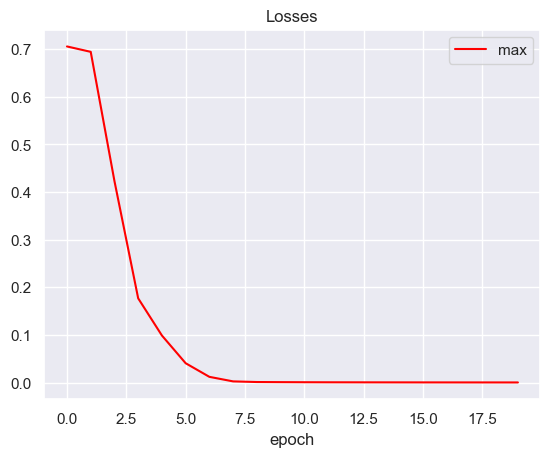

In [137]:
for (name, values), color in zip(losses_type.items(), ['red', 'blue']):
    plt.plot(np.arange(len(losses_type[name])), losses_type[name], color=color, label=name)

plt.title('Losses')
plt.xlabel("epoch")
plt.legend()
plt.show()

Лучшая accuracy для подхода max: 76.19


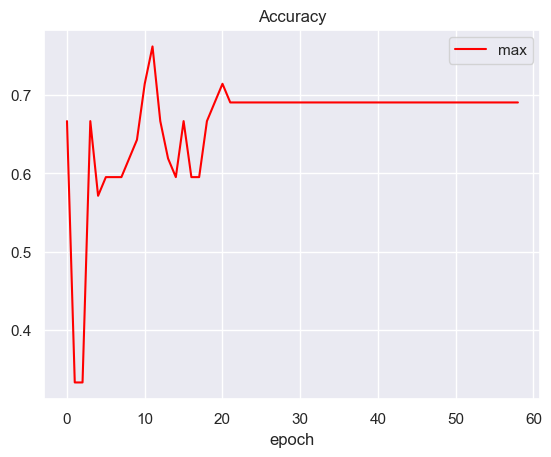

In [138]:
for (name, values), color in zip(losses_type.items(), ['red', 'blue']):
    plt.plot(np.arange(len(acc_type[name][1:])), acc_type[name][1:], color=color, label=name)
    print(f"Лучшая accuracy для подхода {name}: {(max(acc_type[name]) * 100):.2f}")

plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend()
plt.show()

## Проверка на test50

In [142]:
# Ключ "Отзывы" надо поменять на "отзывы"
# Загрузка данных
data = pd.read_csv('test50.csv')
# замена + на 1, - на 0
data['разметка'] = data['разметка'].apply(lambda x: 0 if x == '-' else 1)

data['отзывы'] = data['отзывы'].apply(preprocess_text)

# SVM

In [144]:
# Разделение данных на обучающий и тестовый наборы
X_test, y_test = data['отзывы'], data['разметка']
X_test_tfidf = vectorizer.transform(X_test)

# Предсказание на тестовом наборе
y_pred = classifier.predict(X_test_tfidf)

# Оценка точности классификатора
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.54


# RNN

In [146]:
Test = data
eval_dataset = WordDataset(Test)

batch_size = 8

eval_dataloader = DataLoader(    
    eval_dataset, shuffle=False, collate_fn=collate_fn_with_padding, batch_size=batch_size)

model.eval()
accuracy = evaluate(model)
print(accuracy)


0.4599999785423279
